In [1]:
import sys
import os
sys.path.append('../')
import ghiaseddin

import numpy as np
import lasagne

%matplotlib inline

import matplotlib
import matplotlib.pylab as plt
from datetime import datetime as dt

Using gpu device 0: GeForce GTX TITAN Black (CNMeM is disabled, CuDNN 4007)


In [2]:
zappos1 = ghiaseddin.Zappos50K1(ghiaseddin.settings.zappos_root, attribute_index=0, split_index=0)
googlenet = ghiaseddin.GoogLeNet(ghiaseddin.settings.googlenet_weights)

In [3]:
model = ghiaseddin.Ghiaseddin(extractor=googlenet,
                              dataset=zappos1,
                              weight_decay=1e-5,
                              optimizer=lasagne.updates.rmsprop,
                              ranker_learning_rate=1e-4,
                              extractor_learning_rate=1e-5,
                              ranker_nonlinearity=lasagne.nonlinearities.linear,
                              train_batch_size=16)

In [4]:
matrixes = []

In [5]:
matrixes.append(model.estimates_predictions_corrects_on_test())

In [6]:
for i in range(10):
    model.train_one_epoch()
    print 'epoch %d, accuracy: %2.2f' % (i+1, model.eval_accuracy() * 100)
    matrixes.append(model.estimates_predictions_corrects_on_test())

epoch 1, accuracy: 89.33
epoch 2, accuracy: 90.67
epoch 3, accuracy: 91.33
epoch 4, accuracy: 92.67
epoch 5, accuracy: 92.67
epoch 6, accuracy: 93.00
epoch 7, accuracy: 93.67
epoch 8, accuracy: 93.33
epoch 9, accuracy: 95.00
epoch 10, accuracy: 94.33


In [10]:
for i in range(10):
    model.train_one_epoch()
    print 'epoch %d, accuracy: %2.2f' % (i+1, model.eval_accuracy() * 100)
    matrixes.append(model.estimates_predictions_corrects_on_test())

epoch 1, accuracy: 94.67
epoch 2, accuracy: 93.67
epoch 3, accuracy: 95.00
epoch 4, accuracy: 95.00
epoch 5, accuracy: 95.00
epoch 6, accuracy: 95.00
epoch 7, accuracy: 95.67
epoch 8, accuracy: 95.00
epoch 9, accuracy: 95.67
epoch 10, accuracy: 95.67


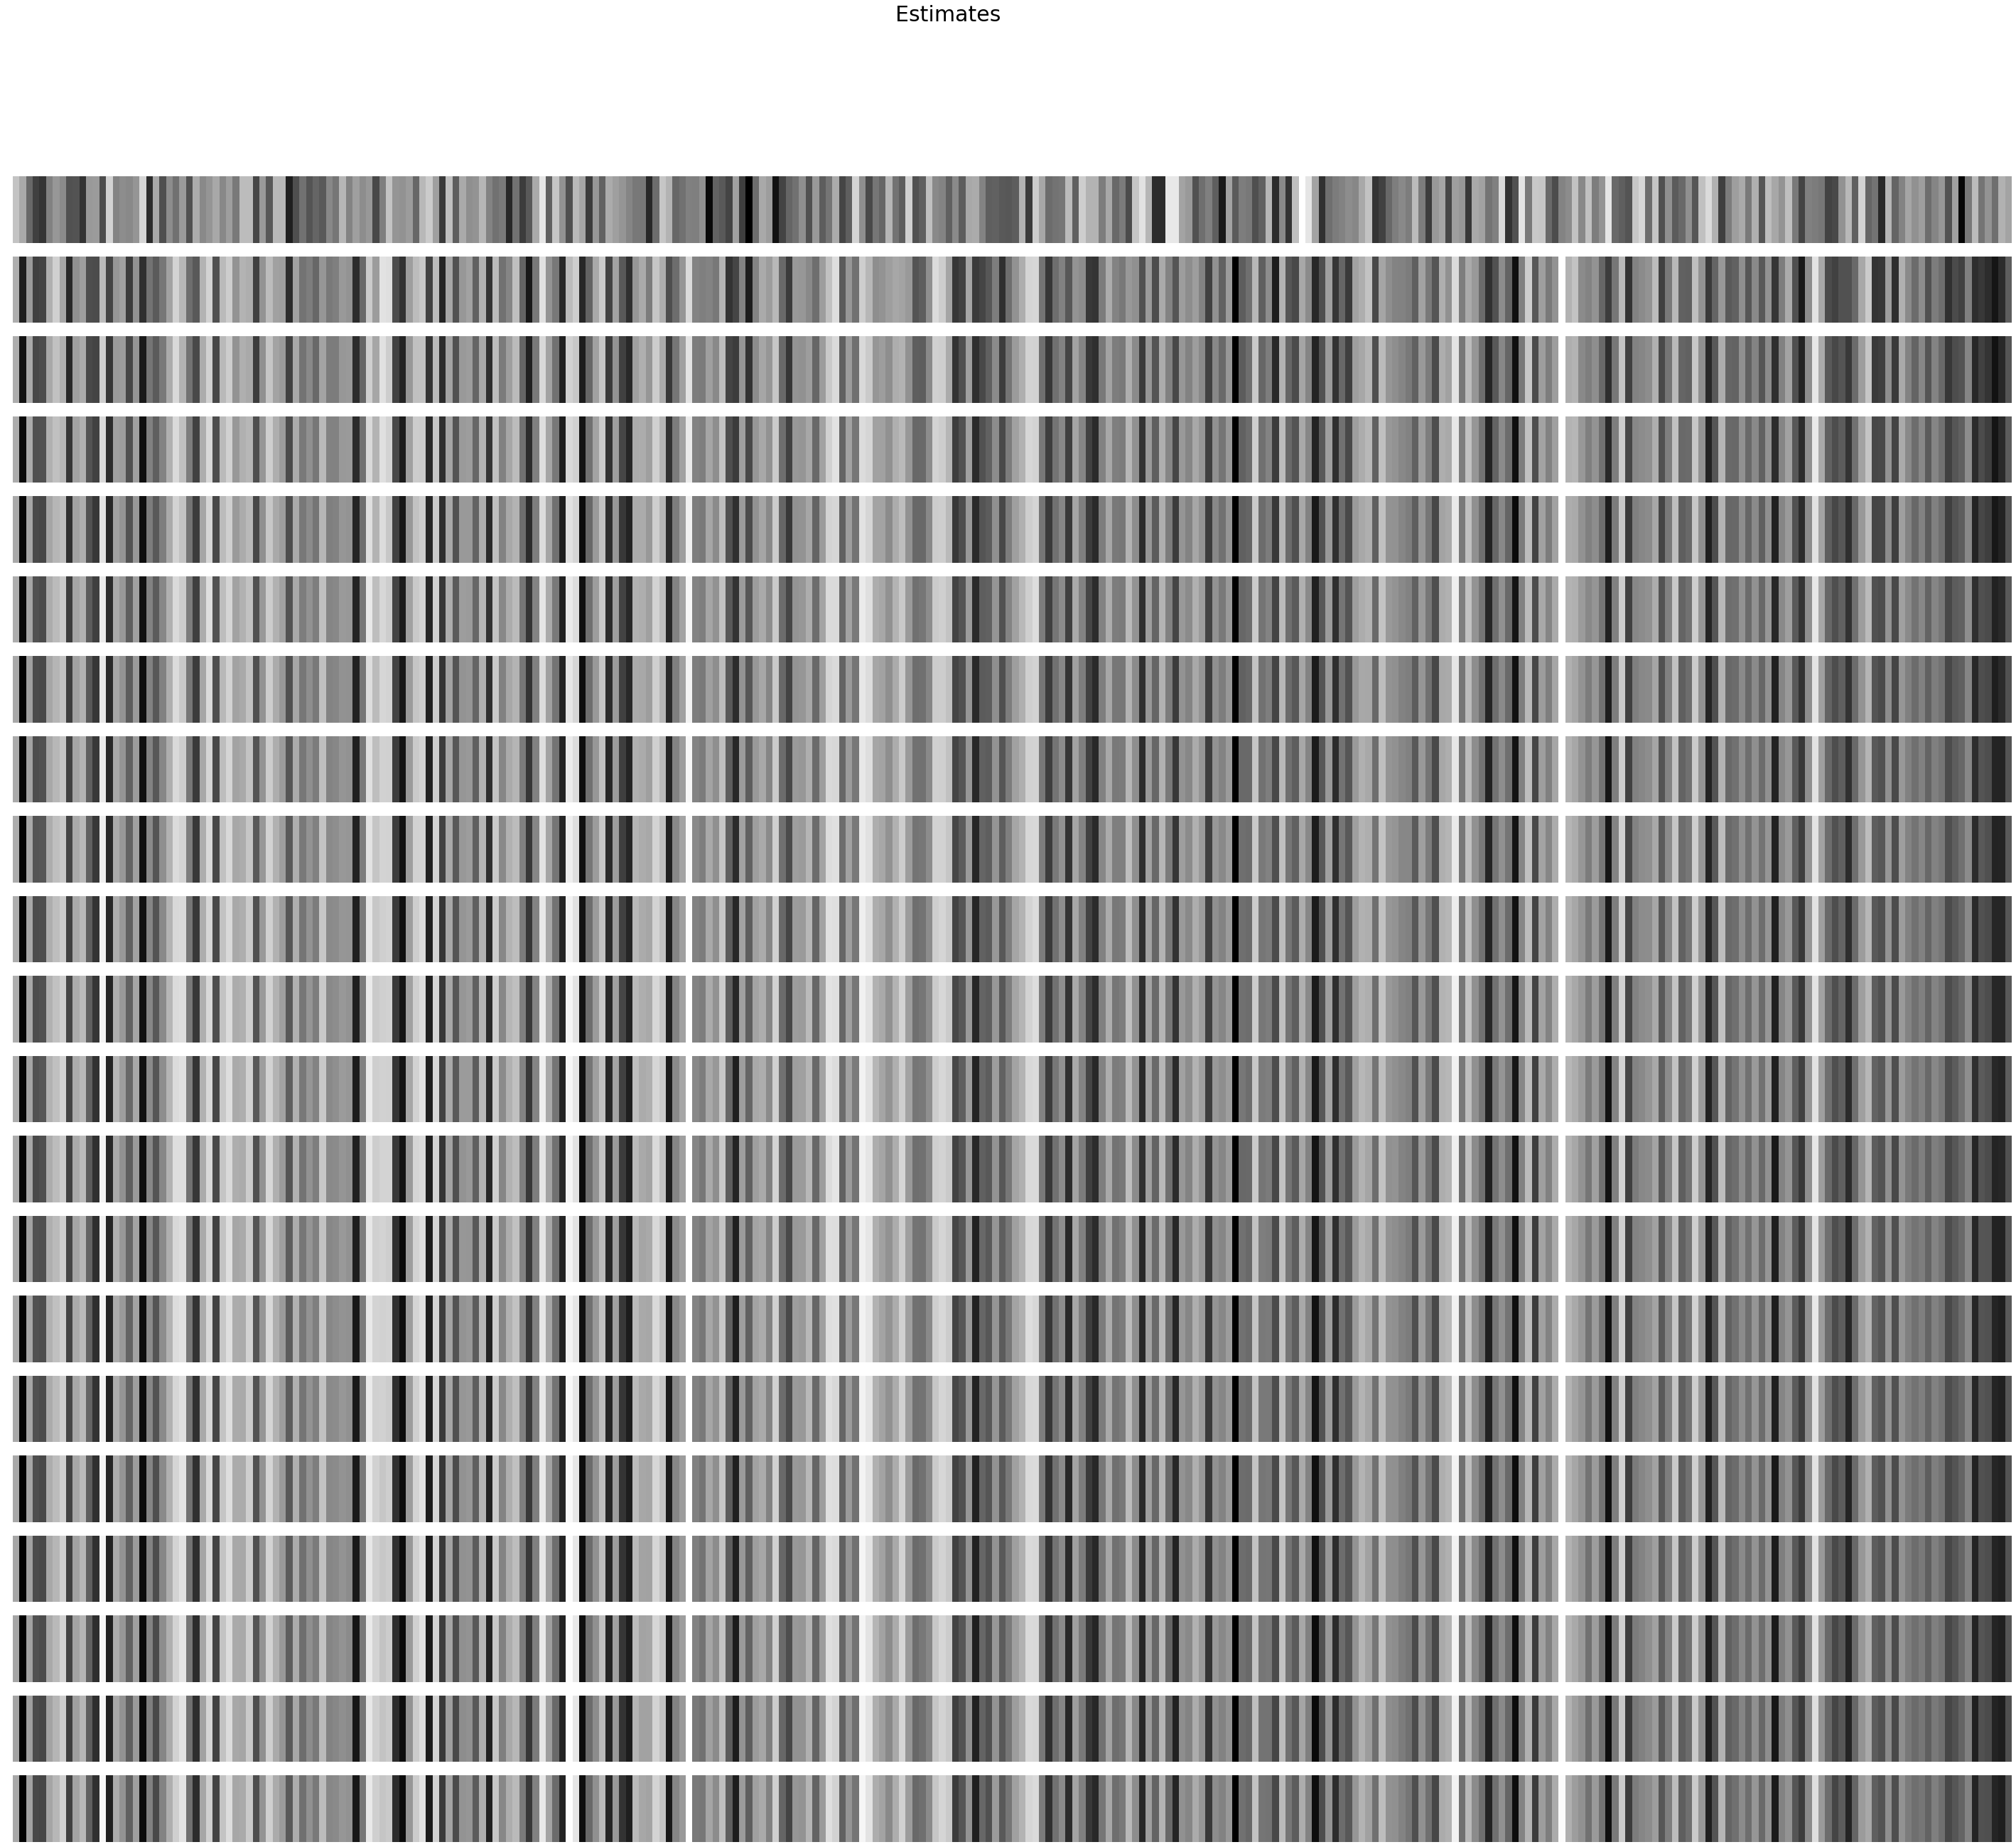

In [11]:
fig = ghiaseddin.utils.show_training_matrixes([ghiaseddin.utils.convert_estimates_on_test_to_matrix(e) for e, p, c in matrixes], 'Estimates')

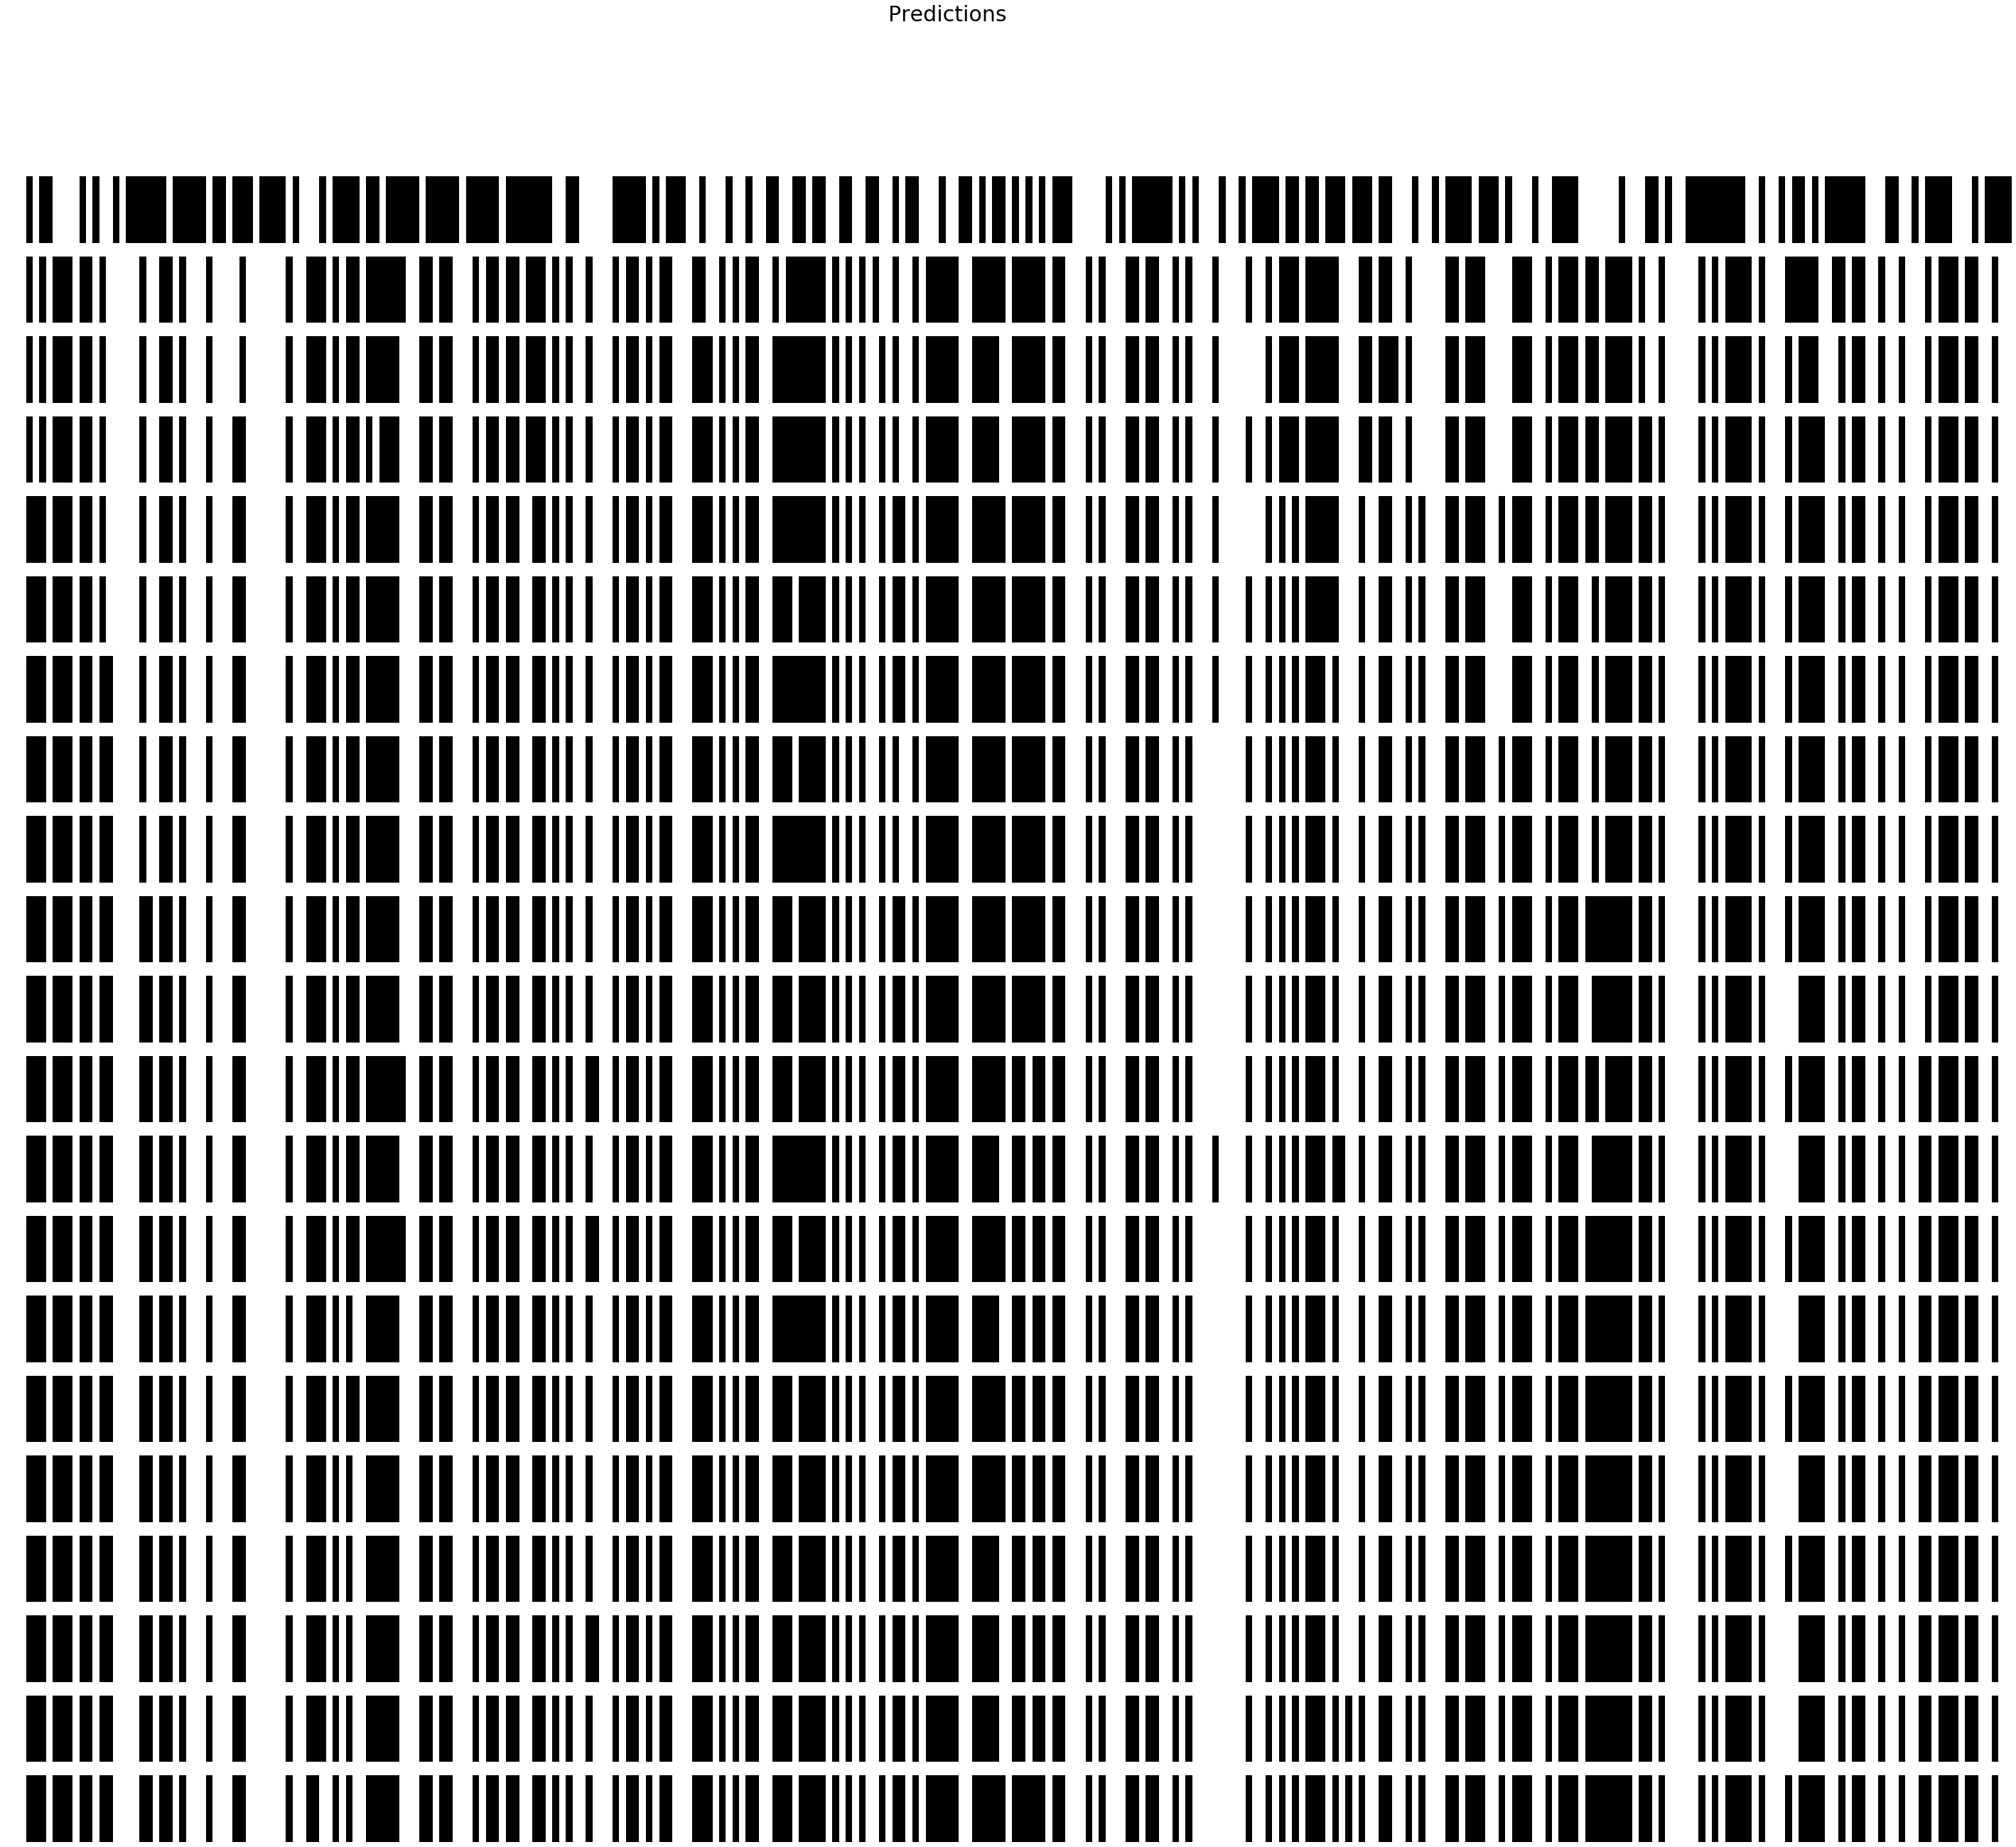

In [12]:
fig = ghiaseddin.utils.show_training_matrixes([ghiaseddin.utils.convert_estimates_on_test_to_matrix(p) for e, p, c in matrixes], 'Predictions')

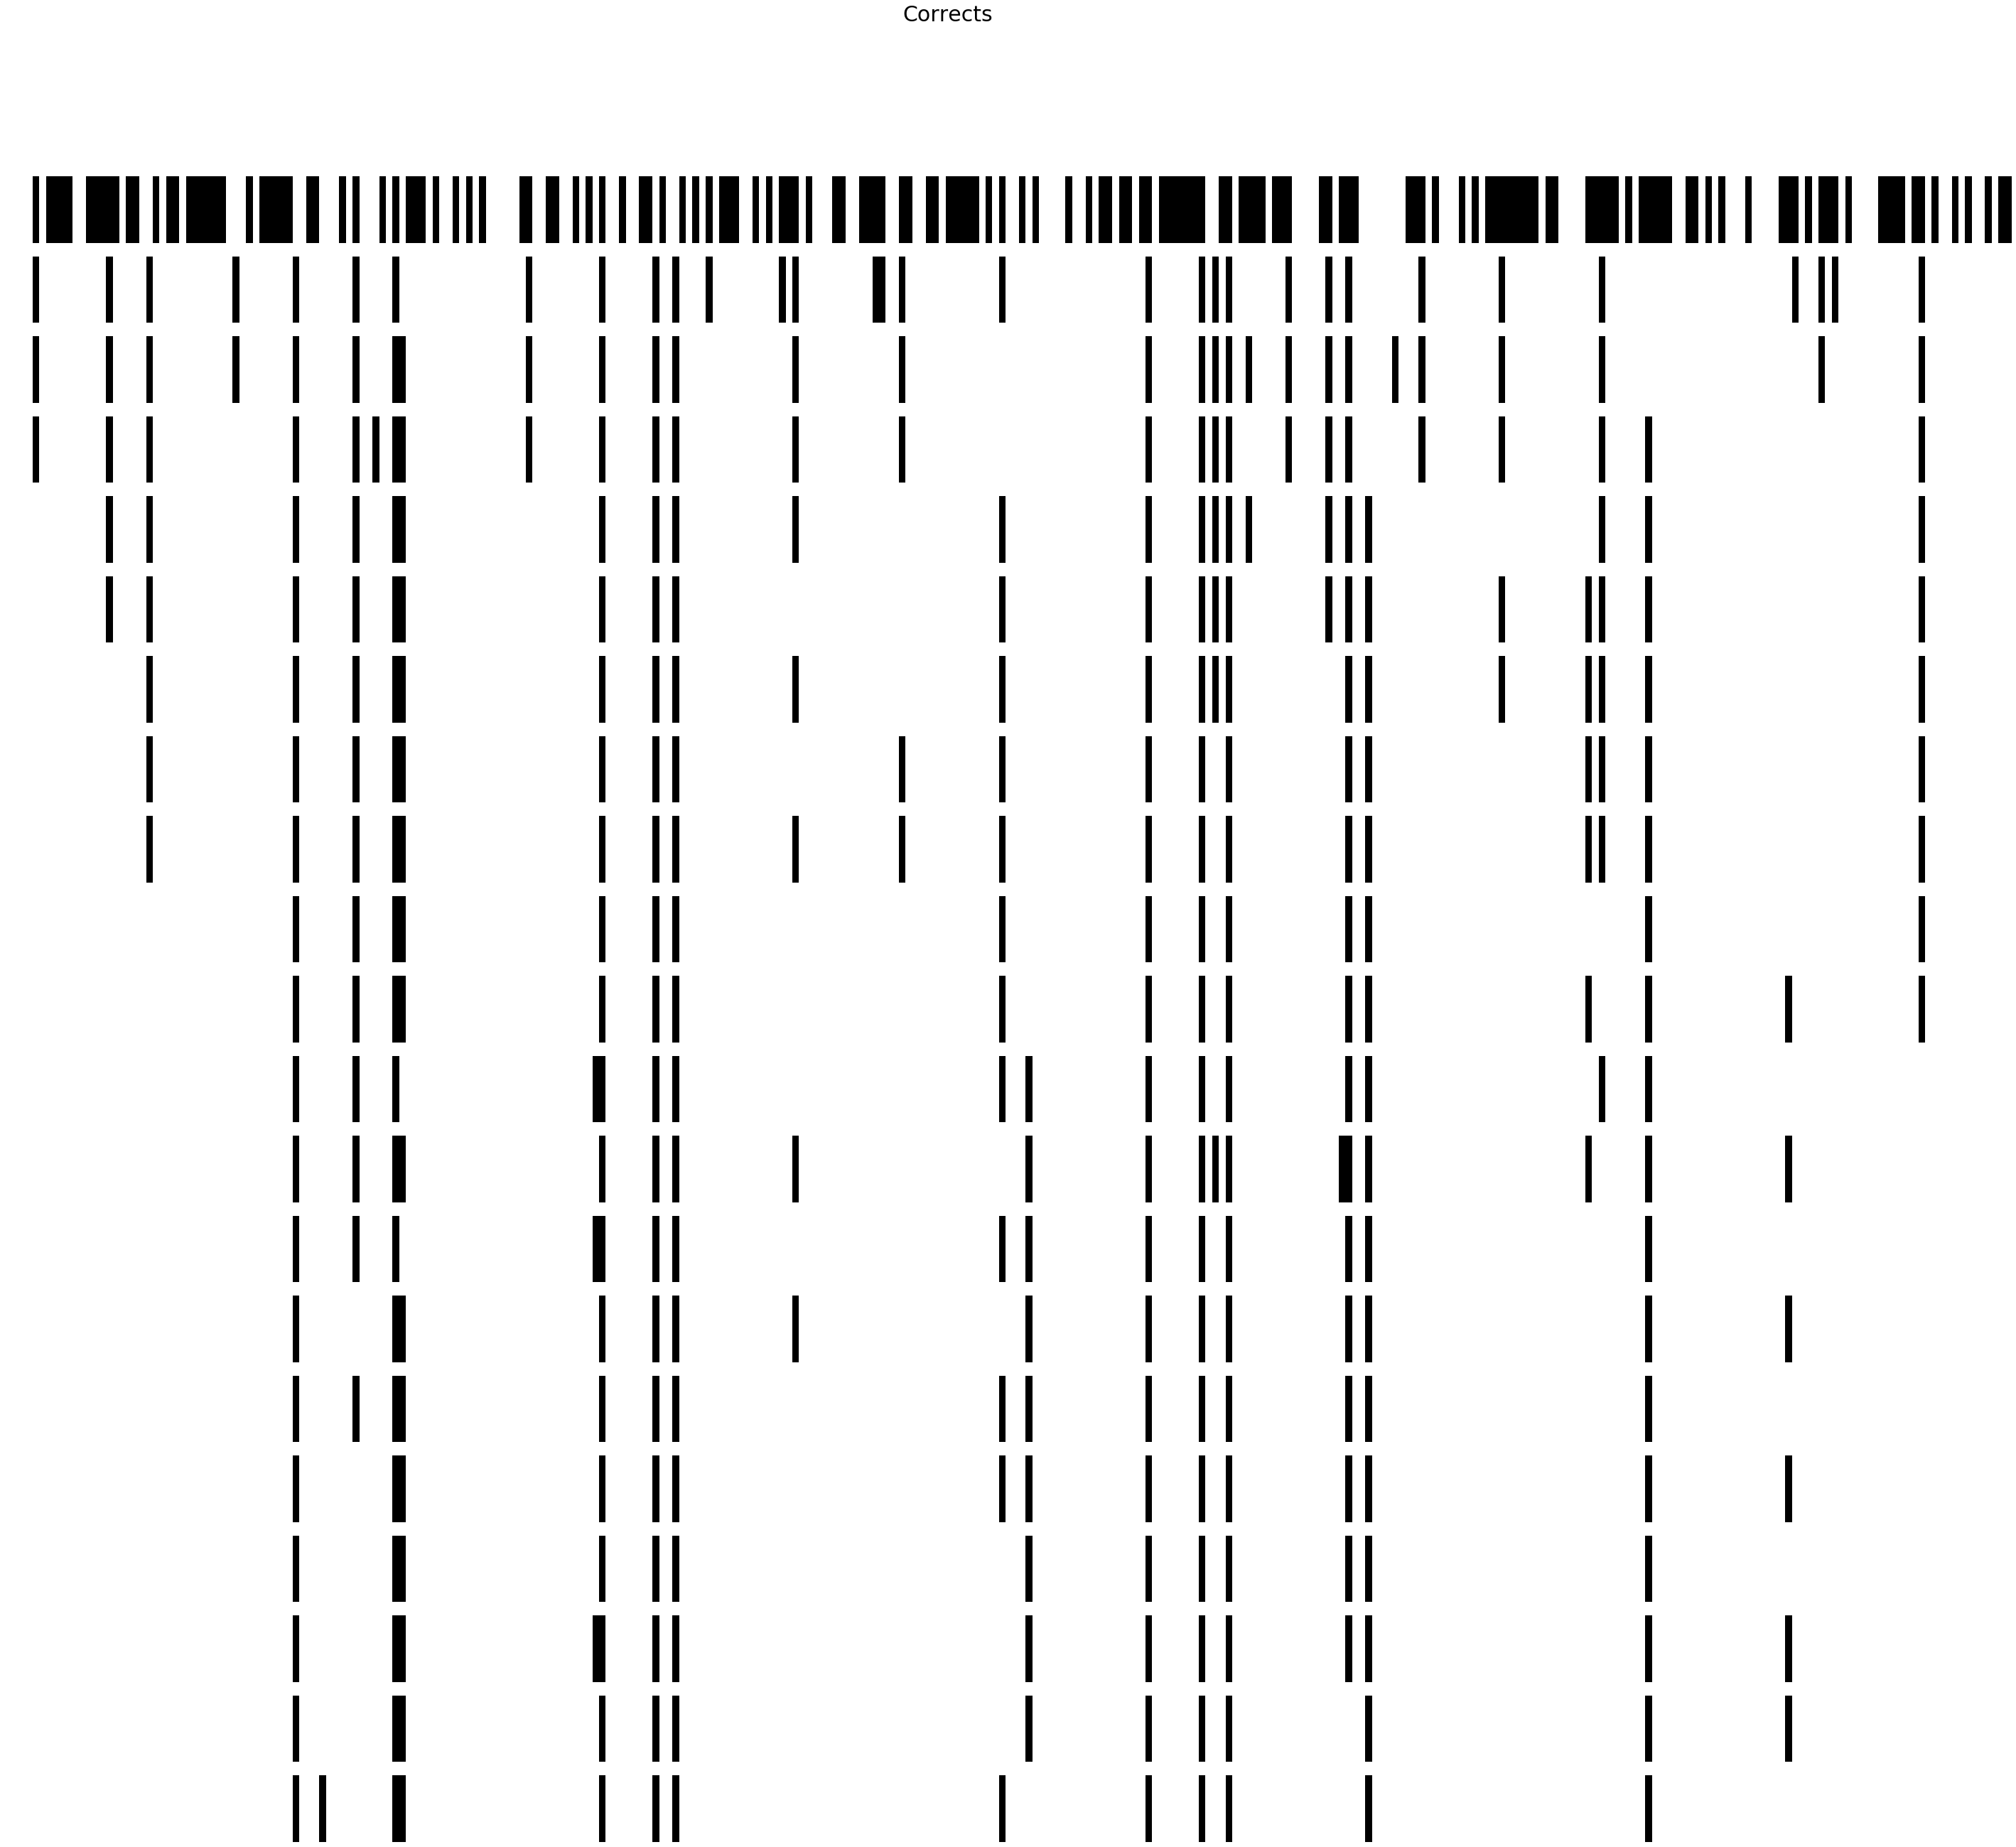

In [13]:
fig = ghiaseddin.utils.show_training_matrixes([ghiaseddin.utils.convert_estimates_on_test_to_matrix(c) for e, p, c in matrixes], 'Corrects')

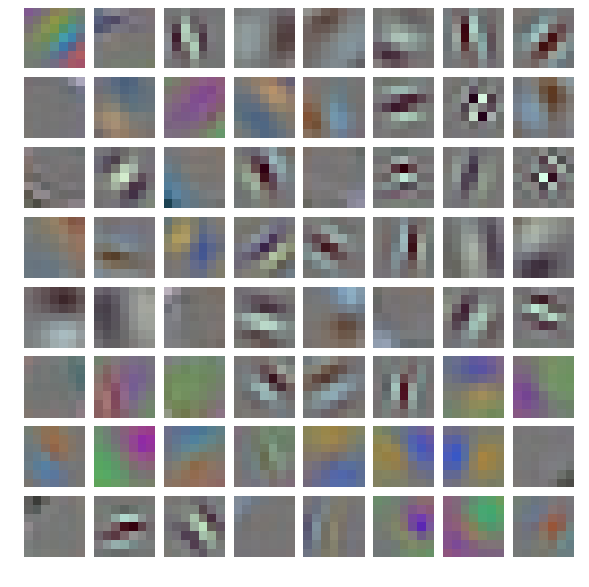

In [14]:
model.conv1_filters()